In [1]:
#importing libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#Loading CSV file
df = pd.read_csv("TelcoCustomerChurn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Handling Missing Values
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors = "coerce")
df = df.dropna()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Encoding Categorical values
labelEncoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'customerID':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        labelEncoders[column] = le

In [5]:
#Feature Scaling
scaler = StandardScaler()
numericalFeatures = ['tenure','MonthlyCharges','TotalCharges']
df[numericalFeatures] = scaler.fit_transform(df[numericalFeatures])

In [6]:
#spliting Data using train test split
X = df.drop(['Churn','customerID'], axis=1)
Y = df['Churn']
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Exploratory Data  Analysis 

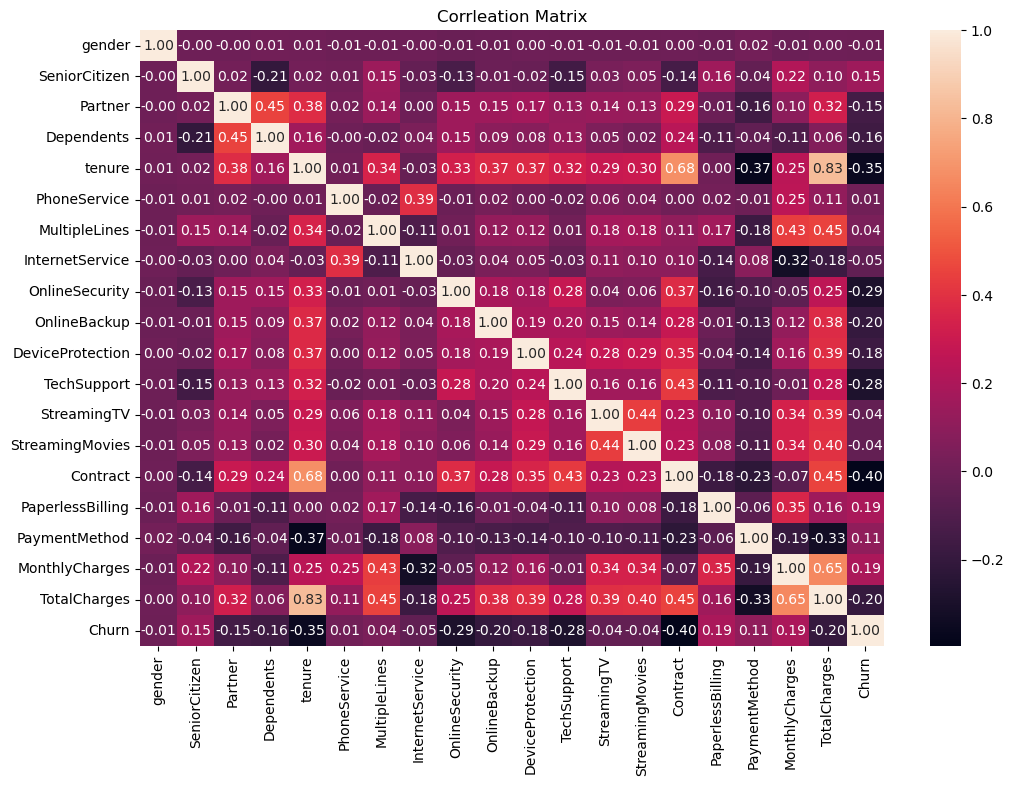

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True,fmt=".2f")
plt.title("Corrleation Matrix")
plt.show()

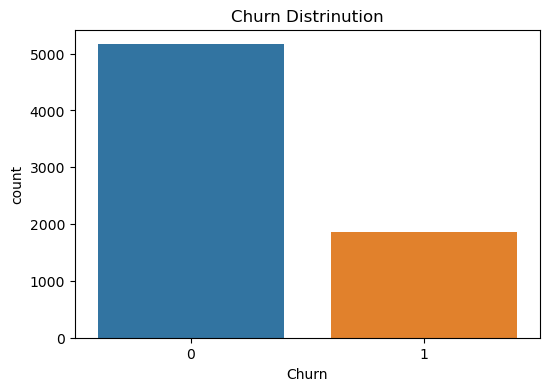

In [15]:
#Distribution of churn
plt.figure(figsize=(6,4))
sns.countplot(x='Churn',data=df)
plt.title('Churn Distrinution')
plt.show()

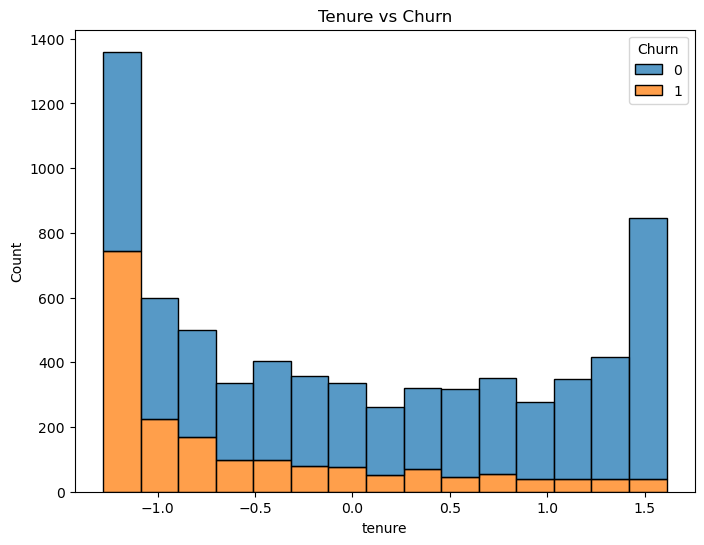

In [16]:
#histplot between tenure vs churn
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='tenure',hue='Churn',multiple='stack')
plt.title('Tenure vs Churn')
plt.show()

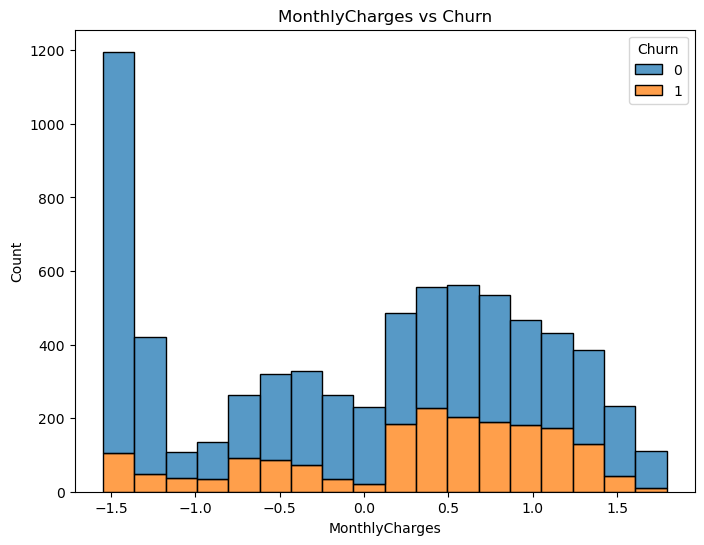

In [19]:
#histplot between tenure vs churn
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='MonthlyCharges',hue='Churn',multiple='stack')
plt.title('MonthlyCharges vs Churn')
plt.show()

## Feature Engineering

In [ ]:
# creating a new feature: tenure groups
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, 72], labels=['0-12', '12-24', '24-48', '48-60', '60-72'])
labelEncoders['tenure_group'] = LabelEncoder() 
df['tenure_group'] = labelEncoders['tenure_group'].fit_transform(df['tenure_group']) 
# Updating the feature set
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## ML Models

In [30]:
# Importing Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [34]:
#Logisitic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_PredLogistic = log_reg.predict(X_test)

In [35]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [36]:
#Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_predGradientBoosting = gb.predict(X_test)


## Model Evaluation

In [38]:
def evaluate_model(y_true, y_pred): 
    accuracy = accuracy_score(y_true, y_pred) 
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred) 
    return accuracy, precision, recall, f1 
# Evaluation 
models = {'Logistic Regression': y_PredLogistic, 'Random Forest': y_pred_rf, 'Gradient Boosting': y_predGradientBoosting}
for model_name, y_pred in models.items(): 
    accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred) 
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

Logistic Regression - Accuracy: 0.7882, Precision: 0.6310, Recall: 0.4893, F1-score: 0.5512
Random Forest - Accuracy: 0.7875, Precision: 0.6426, Recall: 0.4519, F1-score: 0.5306
Gradient Boosting - Accuracy: 0.7960, Precision: 0.6537, Recall: 0.4947, F1-score: 0.5632


## Saving The Model

In [40]:
df.to_csv("TelcoCustomerChurn_Models.csv",index=False)

In [42]:
import joblib
joblib.dump(log_reg, 'logistic_regression_model.pkl')
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(gb, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']